<a href="https://colab.research.google.com/github/lns0061/legendary-adventure/blob/main/%D1%81%D0%B5%D0%BB%D0%B4%D1%8C%D0%BC%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
from math import *
import matplotlib.pyplot as plt

print('Введите грань куба')
d = float(input())

print('Введите число лучей')
num = int(input())

print('Введите 1, если хотите задать свое начало вылета луча или введите 0, если хотите использовать координаты вылета луча: {5,5,5}')
k = int(input())

if k==1:
  x0 = float(input())
  y0 = float(input())
  z0 = float(input())
else:
  x0, y0, z0 = 5, 5, 5

coord = [[d/2, -d/2, -d/2], [d/2, -d/2, d/2], [d/2, d/2, d/2], [d/2, d/2, -d/2],
 [-d/2, -d/2, -d/2], [-d/2, -d/2, d/2], [-d/2, d/2, d/2], [-d/2, d/2, -d/2]]

coord_centr_gr = [[0, -d/2, d/2], [0, d/2, d/2],  [0, d/2, -d/2],
  [0, -d/2, -d/2], [d/2, 0, d/2], [-d/2, 0, d/2],
  [-d/2, 0, -d/2], [d/2, 0, -d/2], [d/2, -d/2, 0],
  [-d/2, -d/2, 0], [-d/2, d/2, 0], [d/2, d/2, 0]]


Введите грань куба
3
Введите число лучей
100
Введите 1, если хотите задать свое начало вылета луча или введите 0, если хотите использовать координаты вылета луча: {5,5,5}
0


In [ ]:
#Функция, определяющая коэффициенты уравнения плоскостей для сторон куба
#Выводит вложенный список, где 1ый список - набор 1ых коэффициентов (А), 2ой - В, 3ий - С, 4ый - D
def surface():
  k1, k2, k3, k4 = [], [], [], []
  for i in range(6):
    count = i
    if count == 0:
      i1, i2, i3, i4 = 0, 1, 5, 4
    elif count == 1:
      i1, i2, i3, i4 = 1, 5, 6, 2
    elif count == 2:
      i1, i2, i3, i4 = 3, 2, 6, 7
    elif count == 3:
      i1, i2, i3, i4 = 0, 4, 7, 3
    elif count == 4:
      i1, i2, i3, i4 = 4, 5, 6, 7
    elif count == 5:
      i1, i2, i3, i4 = 0, 1, 2, 3

    k1.append(coord[i1][1]*coord[i2][2]+coord[i1][2]*coord[i3][1]+coord[i2][1]*coord[i3][2]-coord[i2][2]*coord[i3][1]-coord[i1][2]*coord[i2][1]-coord[i1][1]*coord[i3][2])
    k2.append(coord[i1][2]*coord[i2][0]+coord[i1][0]*coord[i3][2]+coord[i2][2]*coord[i3][0]-coord[i2][0]*coord[i3][2]-coord[i1][0]*coord[i2][2]-coord[i1][2]*coord[i3][0])
    k3.append(coord[i1][0]*coord[i2][1]+coord[i1][1]*coord[i3][0]+coord[i2][0]*coord[i3][1]-coord[i2][1]*coord[i3][0]-coord[i1][1]*coord[i2][0]-coord[i1][0]*coord[i3][1])
    k4.append(-(coord[i1][2]*coord[i2][0]*coord[i3][1]+coord[i1][0]*coord[i2][1]*coord[i3][2]+coord[i1][1]*coord[i2][2]*coord[i3][0]-coord[i1][1]*coord[i2][0]*coord[i3][2]-
              coord[i1][0]*coord[i2][2]*coord[i3][1]-coord[i1][2]*coord[i2][1]*coord[i3][0]))
  kkk = [k1, k2, k3, k4]
  return kkk


In [ ]:
#Функция, задающая коэффициенты прямых, лежащих на гранях куба (задаются с помощью коэффициентов уравнений плоскостей, полученных для сторон куба)
#Выводит вложенный список, где 1ый список - набор 1ых коэффициентов (А), 2ой - В, 3ий - С, 4ый - D
def straight():
  kef = surface()
  k1, k2, k3, k4 = kef[0], kef[1], kef[2], kef[3]
  k10, k20, k30, k40 = [], [], [], []
  for i in range(12):
    ind = [[0,1], [1,2], [2,3], [3,0], [1,5], [1,4], [4,3], [3,5], [0,5], [0,4], [4,2], [2,5]]
    k10.append(k1[ind[i][0]] - k1[ind[i][1]])
    k20.append(k2[ind[i][0]] - k2[ind[i][1]])
    k30.append(k3[ind[i][0]] - k3[ind[i][1]])
    k40.append(k4[ind[i][0]] - k4[ind[i][1]])
  kk = [k10, k20, k30, k40]
  return kk

In [ ]:
#Функция, которая задает случайный луч, а именно его коэффициенты l,m,n  в параметрическом виде
#Выводит список с коэффициентами l,m и n
def ray():
  l = random.uniform(-1, 1)
  m = random.uniform(-1, 1)
  n = random.uniform(-1, 1)
  lmn = [l, m, n]
  return lmn


In [ ]:
#Функция, которая получает координаты точек пересечения луча со сторонами куба (если луч не пересечет одну из сторон, то будет получен пробел вместо ее координаты)
#Выводит вложенный список, где 1ый список - набор координат по оси х, 2ой - по оси у, 3ий по оси z
def intersection():
  t = 0
  rays = ray()
  l, m, n = rays[0], rays[1], rays[2]
  #l, m, n = 0.9, 0.9, 0.9
  x, y, z = [], [], []
  kef = surface()
  k1, k2, k3, k4 = kef[0], kef[1], kef[2], kef[3]
  for i in range(6):
    count = i
    if (k1[count]*l + k2[count]*m + k3[count]*n) != 0:
      t = -(k1[count]*x0 + k2[count]*y0 + k3[count]*z0 + k4[count]) / (k1[count]*l + k2[count]*m + k3[count]*n)
      if t > 0:
        x.append(l*t + x0)
        y.append(m*t + y0)
        z.append(n*t + z0)
      else:
        x.append(' ')
        y.append(' ')
        z.append(' ')
    else:
        x.append(' ')
        y.append(' ')
        z.append(' ')
  inters = [x, y, z]
  return inters

In [ ]:
#Функция, определяющая количество пересечений лучей с кубом (детектором)
#Выводит список, где каждый элемент - число пересечений соответствующего луча
def where_intersection():
  cc=[]
  tt=[]
  straights = straight()
  k10, k20, k30, k40 = straights[0], straights[1], straights[2], straights[3]
  peresecheniye = []
  pryamye_dlya_lmn = [3, 0, 1, 2, 6, 7]
  pryamye_ot_storony = [[3, 8, 0, 9], [0, 5, 1, 4], [1, 10, 2, 11], [2, 7, 3, 6], [6, 9, 5, 10], [7, 8, 4, 11]]
  tochki_grani = [[1, 5], [2, 6], [3, 7], [0, 4], [1, 2], [5, 6], [4, 7], [0, 3], [0, 1], [4, 5], [6, 7], [2, 3]]
  intersec = intersection()

  for i in range(6):
    count = i
    a = 0
    kkkk = 0
    peresech = 0
    if (type(intersec[0][count]) == float) or (type(intersec[0][count]) == int):
      a = 1
      l01 = - intersec[0][count] + coord_centr_gr[pryamye_dlya_lmn[count]][0]
      m01 = - intersec[1][count] + coord_centr_gr[pryamye_dlya_lmn[count]][1]
      n01 = - intersec[2][count] + coord_centr_gr[pryamye_dlya_lmn[count]][2]
      l1 = l01 / (l01**2+m01**2+n01**2)**0.5
      m1 = m01 / (l01**2+m01**2+n01**2)**0.5
      n1 = n01 / (l01**2+m01**2+n01**2)**0.5
      for j in range(1,4):
        if (k10[pryamye_ot_storony[count][j]]*l1 + k20[pryamye_ot_storony[count][j]]*m1 + k30[pryamye_ot_storony[count][j]]*n1) != 0:
          t = -((k10[pryamye_ot_storony[count][j]]*intersec[0][count] + k20[pryamye_ot_storony[count][j]]*intersec[1][count] +
                k30[pryamye_ot_storony[count][j]]*intersec[2][count] + k40[pryamye_ot_storony[count][j]])/(k10[pryamye_ot_storony[count][j]]*l1 +
                k20[pryamye_ot_storony[count][j]]*m1 + k30[pryamye_ot_storony[count][j]]*n1))
          if t > 0:
            kkkk=1
            xp = l1*t + intersec[0][count]
            yp = m1*t + intersec[1][count]
            zp = n1*t + intersec[2][count]
            if ((coord[tochki_grani[pryamye_ot_storony[count][j]][0]][0] - xp)**2 + (coord[tochki_grani[pryamye_ot_storony[count][j]][0]][1] - yp)**2 +
                (coord[tochki_grani[pryamye_ot_storony[count][j]][0]][2] - zp)**2 + (coord[tochki_grani[pryamye_ot_storony[count][j]][1]][0] - xp)**2 +
                (coord[tochki_grani[pryamye_ot_storony[count][j]][1]][1] - yp)**2 + (coord[tochki_grani[pryamye_ot_storony[count][j]][1]][2] - zp)**2 < d**2):
              peresech += 1
    if peresech == 0 and kkkk==1:
      peresecheniye.append(1)
    else:
      peresecheniye.append(0)

  return peresecheniye

In [ ]:
leng = [i/2 for i in range(int(d)*20)]
aaa=[]
for i in leng:
  qq = 0
  for j in range(num):
    x0, y0, z0 = i, 0, 0
    aa = sum(where_intersection())

    if aa == 1 or aa == 2:
      qq +=1
  aaa.append(qq/num)

Вероятность регистрации детектором излучения с гранью 3.0 излучения от источника, расположенного в координатах (5, 5, 5), при 100 лучах = 0.03

Вероятность регистрации детектором излучения с гранью 3.0 излучения от источника, расположенного в вершине детектора, при 100 лучах = 0.13

Вероятность регистрации детектором излучения с гранью 3.0 излучения от источника, расположенного в центре одного из ребер, при 100 лучах = 0.21



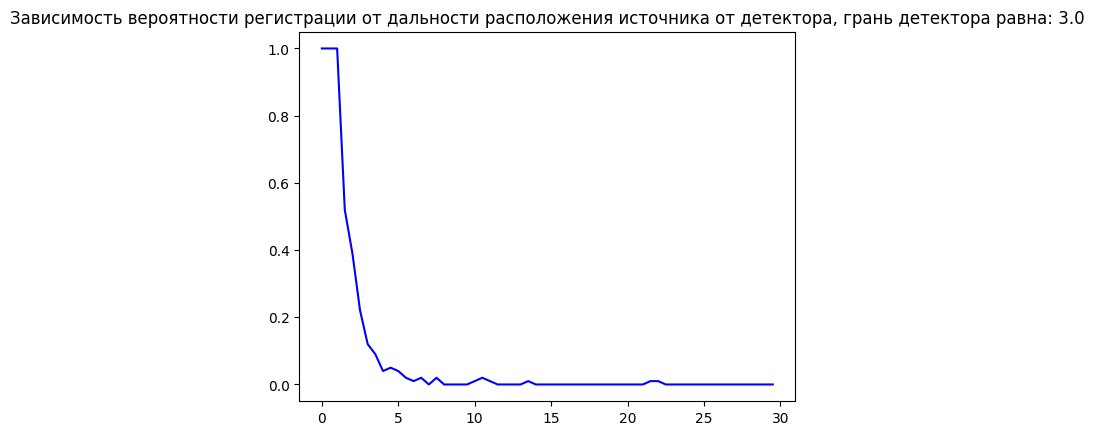

In [ ]:
qq=0
for j in range(num):
  x0, y0, z0 = 5, 5, 5
  aa = sum(where_intersection())

  if aa == 1 or aa == 2:
    qq +=1
print(f"Вероятность регистрации детектором излучения с гранью {d} излучения от источника, расположенного в координатах {x0, y0, z0}, при {num} лучах =", qq/num)
print()
qq=0
for j in range(num):
  x0, y0, z0 = d/2, -d/2, -d/2
  aa = sum(where_intersection())

  if aa == 1 or aa == 2:
    qq +=1
print(f"Вероятность регистрации детектором излучения с гранью {d} излучения от источника, расположенного в вершине детектора, при {num} лучах =", qq/num)
print()
qq=0
for j in range(num):
  x0, y0, z0 = 0, -d/2, d/2
  aa = sum(where_intersection())

  if aa == 1 or aa == 2:
    qq +=1
print(f"Вероятность регистрации детектором излучения с гранью {d} излучения от источника, расположенного в центре одного из ребер, при {num} лучах =", qq/num)
print()
plt.plot()
plt.title(f'Зависимость вероятности регистрации от дальности расположения источника от детектора, грань детектора равна: {d}')
plt.plot(leng, aaa, color='blue')

plt.show()